## Programming for Data Analysis Project Notebook 2020 - Killian Foley
### Problem Statement
As a manufacturing engineer at electric motor manufacturing company "Bratwurst Motors" I have been assigned the task of performing a tolerance stackup analysis, on a linear assembly of multiple parts using the Monte Carlo simulation method. The use of tolerancing is very important in the mechanical design process because it effects product quality and manufacturing cost. [1] From Wikipedia [2] Tolerance analysis is described as "the general term given to describe the study of accumulated variation in mechanical parts and assemblies". Tolerance stackup is a process used in mechanical engineering for calculating the effects of the accumulated variation that is allowed by specified dimensions and tolerances provided on manufacturing drawings. Monte Carlo simulation is a computational simulation that relies on repeated random sampling according to a probability distribution to obtain numerical results. [3] 

<br>

The below assembly drawing shows the example application. In order for the stator and bearing assembly (motor shaft) to fit inside the frame a clearance must be present. That is, the frame is slightly wider than the bearings and stator. The variables will be explained in more detail below.

#### Assembly Drawing
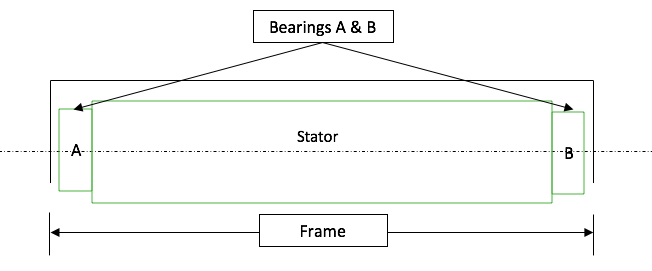

#### Variables Explained
Bearing A = width (mm) Procured parts with dimensions including tolerances provided by the manufacturer. [4]  
Stator = length (mm) Manufactured part with tolerance provided by the design engineer according to GD&T standards (IT15) [5]  
Bearing B = width (mm) Same as bearing A above  
Frame = width (mm) Manufactured part with tolerance provided by the design engineer according to GD&T standards (IT14) [5]  
Clearance Gap = A gap must be present between the frame and the outer bearigns so the motor shaft can fit.  
<br>
In order to create a dataset to perform the analysis the 4 variables (Bearings A&B, Stator and Frame) will have 200 data points simulated according to a normal distribution with the upper and lower tolerance limits being equal to +3$\sigma$ and -3$\sigma$ respectively.  
The gap will then be calculated for each assembly according to the formula  
Clearance Gap(mm) = Frame(mm) - (Bearing A(mm) + Stator(mm) + Bearing B(mm))
From this result we can investigate how many, if any will result in no clearnace gap.

#### Simulating the Random Variables
First the relevant Python packages are imported - Numpy, Pandas, Matplotlib.pyplot, Seaborn. Numpy.random will be used to generate the data. The number of datapoints simulated for each variable will be 200. In order to ensure reproducible data a generator seed is set in Numpy.random.
<br>
As outlined above each of the variables will be simulated according to a normal (Gaussian) distribution. The nominal dimensions and tolerances are as follows
Bearings = 15mm + 0/- 0.120mm  
Stator = 180mm +/- 1.6mm  
Frame = 211 +/- 1.15mm  

In [1]:
#start by importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set Numpy precision to 3 decimal places due to practical measurement accuracies
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

#setting the random generator so results can be reproduced

from numpy.random import default_rng
rg = default_rng(135792468)

#Generate bearing A data using normal distribution
bearing_mu, bearing_sigma = 14.96, 0.02 # assign bearing mean and standard deviation
bearing_width_A = rg.normal(bearing_mu, bearing_sigma, 200) #np.random.normal simulates 200 data points
bearing_width_A

array([14.936, 14.981, 14.945, 14.971, 14.943, 14.967, 14.985, 14.996,
       14.96 , 14.945, 14.962, 14.977, 14.987, 14.99 , 14.949, 14.94 ,
       14.933, 14.996, 14.968, 14.93 , 14.94 , 14.961, 14.986, 14.961,
       14.977, 14.937, 14.95 , 14.977, 14.941, 14.959, 14.962, 14.987,
       14.983, 14.97 , 14.945, 14.976, 14.964, 14.948, 14.988, 14.958,
       14.964, 14.974, 14.984, 14.986, 14.964, 14.959, 14.978, 14.952,
       14.948, 14.922, 14.937, 14.965, 14.977, 14.959, 14.992, 14.949,
       14.962, 14.946, 14.944, 15.014, 14.96 , 14.974, 14.941, 14.952,
       14.93 , 14.927, 14.996, 14.974, 14.975, 14.98 , 14.946, 14.986,
       14.961, 14.936, 14.951, 14.939, 14.961, 14.952, 14.921, 14.959,
       14.964, 14.953, 14.993, 14.921, 14.963, 14.986, 14.983, 14.938,
       14.943, 14.947, 14.939, 14.984, 14.991, 14.903, 14.932, 14.947,
       14.948, 14.924, 14.918, 14.971, 14.967, 14.967, 14.946, 14.988,
       14.94 , 14.929, 14.956, 14.968, 14.942, 14.936, 14.933, 14.984,
      

In [2]:
#Generating bearing B data using normal distribution
#Use same bearing mu and sigma from bearing A
bearing_width_B = rg.normal(bearing_mu, bearing_sigma, 200) #simulate bearing B width using normal distribution
bearing_width_B

array([14.978, 14.998, 14.914, 14.95 , 14.937, 14.956, 14.949, 14.958,
       15.003, 14.96 , 14.964, 14.978, 14.956, 14.956, 14.966, 14.952,
       14.979, 14.945, 14.95 , 14.954, 14.957, 14.947, 14.968, 14.966,
       14.973, 14.998, 14.986, 14.953, 14.946, 14.971, 14.978, 14.948,
       14.998, 14.962, 14.962, 14.983, 14.996, 14.971, 14.988, 14.972,
       14.95 , 14.988, 14.95 , 14.942, 14.963, 14.977, 14.961, 14.965,
       14.961, 14.921, 14.966, 14.983, 14.985, 14.976, 14.972, 14.931,
       14.978, 14.962, 14.984, 14.954, 14.952, 14.938, 14.933, 14.946,
       14.971, 14.959, 14.983, 14.964, 14.937, 14.973, 14.975, 14.983,
       14.948, 14.96 , 14.968, 14.965, 14.951, 14.971, 14.959, 14.938,
       14.983, 14.962, 14.96 , 14.981, 14.977, 14.964, 14.97 , 14.981,
       14.958, 14.972, 14.955, 14.955, 14.943, 14.971, 14.961, 14.933,
       14.963, 14.964, 14.95 , 14.927, 14.969, 14.968, 14.951, 14.982,
       14.972, 14.986, 14.931, 14.94 , 14.901, 14.977, 14.954, 14.957,
      

### Six Sigma $\sigma$
As the manufacturing facilty employs Six Sigma techniques the manufacturing yield will be designed to these parameters. That is, the upper and lower tolerance limits will be +3 and -3 standard deviations ($\sigma$) respectively with the distribution centred around the halfway point ($\mu$).  
https://en.wikipedia.org/wiki/Six_Sigma

In [3]:
stator_mu, stator_sigma = 180.0, 0.533 # assign stator mean and standard deviation
stator_length = rg.normal(stator_mu, stator_sigma, 200) # simulate hole diameter variable using normal distribution
stator_length

array([179.545, 179.383, 180.365, 179.491, 180.239, 180.873, 179.079,
       180.176, 179.575, 179.714, 179.698, 179.43 , 180.529, 180.606,
       179.819, 180.672, 179.951, 179.449, 181.505, 179.428, 180.4  ,
       180.311, 180.281, 179.729, 180.577, 178.952, 180.223, 180.25 ,
       180.945, 180.396, 179.603, 179.437, 179.634, 179.81 , 180.182,
       180.828, 179.844, 180.895, 179.195, 181.148, 180.326, 180.042,
       180.762, 180.056, 179.328, 180.212, 180.396, 179.783, 179.543,
       179.673, 180.105, 180.146, 180.483, 179.795, 180.354, 179.914,
       180.798, 179.226, 179.531, 180.196, 180.275, 180.721, 180.347,
       179.667, 180.538, 179.284, 180.072, 179.491, 179.655, 179.94 ,
       180.359, 180.23 , 180.068, 179.962, 179.452, 179.525, 179.603,
       179.85 , 180.73 , 179.634, 180.233, 180.392, 180.255, 180.138,
       180.77 , 179.61 , 179.496, 180.443, 180.419, 180.272, 179.477,
       179.967, 179.045, 179.629, 180.116, 180.366, 179.838, 180.055,
       180.667, 179.

In [4]:
frame_mu, frame_sigma = 211.0, 0.383 # assign frame mean and standard deviation
frame_width = rg.normal(frame_mu, frame_sigma, 200) # simulate hole diameter variable using normal distribution
frame_width

array([210.042, 211.032, 211.327, 210.584, 211.435, 211.057, 211.42 ,
       210.694, 211.263, 211.449, 211.912, 210.69 , 210.725, 211.026,
       211.043, 211.294, 210.773, 211.657, 211.102, 211.169, 211.042,
       210.885, 210.979, 211.484, 210.049, 210.892, 210.932, 211.267,
       210.931, 210.935, 211.068, 210.713, 210.924, 211.337, 210.503,
       210.841, 210.171, 210.704, 211.292, 210.478, 210.87 , 211.2  ,
       210.209, 211.322, 211.227, 211.543, 212.258, 211.254, 211.066,
       210.895, 211.047, 211.147, 211.357, 211.288, 211.259, 211.356,
       210.82 , 210.86 , 210.921, 211.608, 211.115, 211.25 , 210.781,
       211.023, 211.315, 210.939, 210.537, 211.243, 211.241, 211.324,
       211.412, 210.715, 211.335, 211.299, 211.094, 211.497, 210.826,
       211.022, 211.051, 210.903, 211.655, 210.13 , 211.551, 211.106,
       210.343, 210.785, 210.659, 211.066, 210.971, 211.849, 210.988,
       210.876, 210.638, 210.963, 210.553, 211.207, 211.318, 211.234,
       211.822, 211.

### Calculating Clearance Gap of Assemblies
Now that all the random data has been simulated the relating gap clearances can be calculated using the formula  
Clearance Gap(mm) = Frame(mm) - (Bearing A(mm) + Stator(mm) + Bearing B(mm)).  
Numpy will create a np.array with the 200 results

In [5]:
#calculate the clearance gap for each combination of assembly parts
clearance_gap = frame_width - (bearing_width_A + stator_length + bearing_width_B)
clearance_gap

array([ 0.584,  1.67 ,  1.104,  1.172,  1.316,  0.26 ,  2.408,  0.563,
        1.725,  1.83 ,  2.287,  1.306,  0.254,  0.474,  1.309,  0.73 ,
        0.91 ,  2.267, -0.322,  1.856,  0.745,  0.666,  0.745,  1.828,
       -0.478,  2.006,  0.774,  1.088,  0.099,  0.608,  1.526,  1.341,
        1.309,  1.594,  0.413,  0.054,  0.367, -0.11 ,  2.121, -0.6  ,
        0.63 ,  1.196, -0.487,  1.338,  1.972,  1.395,  1.923,  1.554,
        1.614,  1.381,  1.04 ,  1.053,  0.912,  1.559,  0.941,  1.561,
        0.082,  1.727,  1.461,  1.443,  0.928,  0.617,  0.56 ,  1.457,
        0.877,  1.769,  0.486,  1.814,  1.674,  1.431,  1.132,  0.517,
        1.359,  1.441,  1.723,  2.068,  1.311,  1.248,  0.442,  1.372,
        1.475, -0.176,  1.344,  1.066, -0.367,  1.226,  1.21 ,  0.705,
        0.649,  1.658,  1.617,  0.97 ,  1.659,  1.46 ,  0.544,  0.961,
        1.569,  1.291,  1.288,  1.338,  0.305,  0.82 ,  0.114,  1.13 ,
        0.533,  0.258,  1.615,  2.517,  0.519,  1.012,  1.675,  0.335,
      

### Create a Pandas DataFrame of the variables
[Pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
A Pandas DataFrame can be created from a Dictionary of the NumPy arrays that were created. At this point the columns associated with the variables will be given names.

In [6]:
d = {'BearingA': bearing_width_A, 'StatorLength': stator_length, 'BearingB': bearing_width_B, 'FrameWidth': frame_width, 'Clearance': clearance_gap}
df = pd.DataFrame(data=d)
df

,BearingA,StatorLength,BearingB,FrameWidth,Clearance
0,14.936,179.545,14.978,210.042,0.584
1,14.981,179.383,14.998,211.032,1.670
2,14.945,180.365,14.914,211.327,1.104
3,14.971,179.491,14.950,210.584,1.172
4,14.943,180.239,14.937,211.435,1.316
...,...,...,...,...,...
195,14.978,179.544,14.975,210.295,0.798
196,14.972,179.843,14.962,210.845,1.068
197,14.926,180.051,14.963,211.561,1.622
198,14.964,180.176,14.966,210.950,0.844


### Statistical Summary of the Data Using df.describe( )
The pandas.DataFrame.describe() function generates descriptive statistics of the dataset such as mean, standard deviation, max and min and so on. This is a nice explorative summary table of the variables.

In [7]:
df.describe()

,BearingA,StatorLength,BearingB,FrameWidth,Clearance
count,200.000,200.000,200.000,200.000,200.000
mean,14.960,180.011,14.960,211.017,1.086
std,0.021,0.514,0.019,0.404,0.689
min,14.903,178.521,14.901,210.042,-0.600
25%,14.945,179.633,14.949,210.774,0.638
50%,14.960,180.056,14.962,211.024,1.131
75%,14.974,180.361,14.973,211.283,1.482
max,15.014,181.505,15.005,212.258,3.248


### How Many Assemblies Failed - i.e Negative (-) "Clearance" values
One of the initial observations of the dataset is there are some assemblies with a negative clearance value i.e. they will not fit together. It would be useful to know how many exist and what percentage of overall assemblies it is. One way to do this is by converting "Clearance" column to a np array using np.flatten() and using np.sum() to aggregate them.

In [8]:
#flatten the dataframe column to np array to perform calculation for % values <0
#https://stackoverflow.com/questions/36155942/need-count-of-negative-values-in-a-dataframe
clearance_flatten = df['Clearance'].values.flatten()
number_less_than_zero = sum(n <= 0 for n in clearance_flatten)
percent_less_than_zero = (sum(n <= 0 for n in clearance_flatten) /200) * 100
print (f'The number of assemblies with clearance less than 0 is {number_less_than_zero:.1f}' )
print (f'The percentage of assemblies with clearance less than 0 is {percent_less_than_zero:.1f}%')

The number of assemblies with clearance less than 0 is 12.0
The percentage of assemblies with clearance less than 0 is 6.0%


## Explorative Data Analysis (EDA)
#### Seaborn Scatterplot grid
A scatter plot grid of the variables is an excellent way to view the relative distribution of each variable. On the diagonal a kde (kernel density estimate) is plotted showing the distribution of that variable. 

A Seaborn Pairplot is a quick, effective way to create a powerful exploratory data analysis (EDA) visualization. [6] It allows us to visualise distributions of both single variables and relationships between two variables. Pair plots are a very effective method to identify trends that may exist in the data, and would warrant follow up analysis

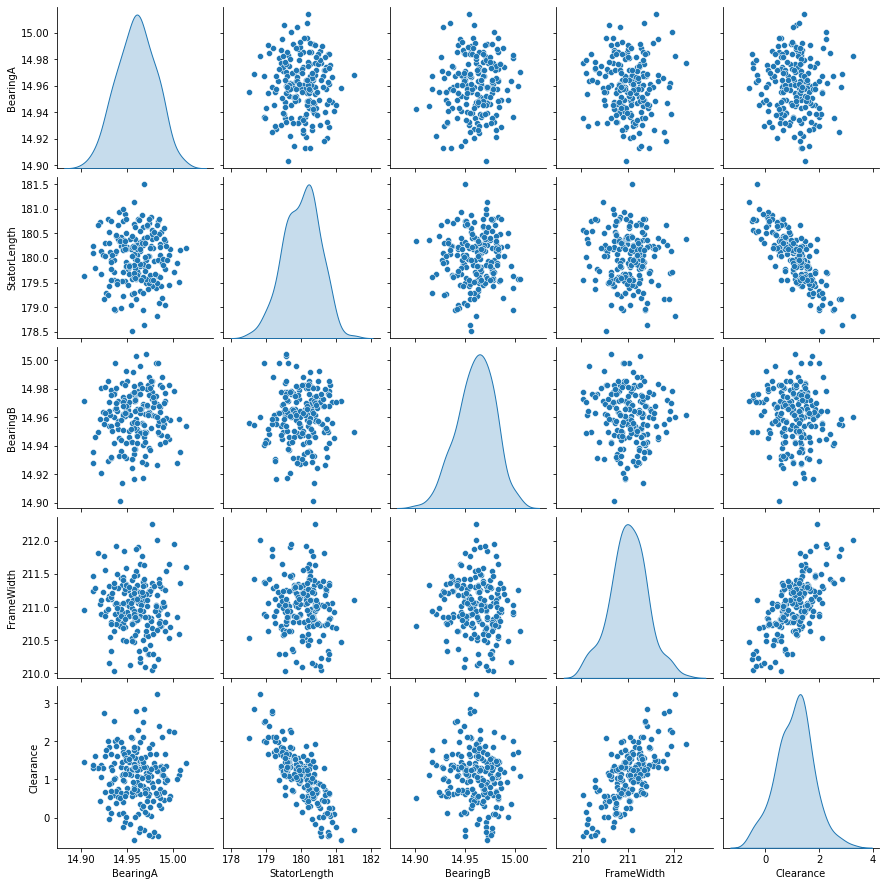

In [9]:
sns.pairplot(df, diag_kind='kde');

Focusing on the bottom row of the above pairplot, the "Clearance" variable, "Stator Length" appears to have a negative linear relationship with "Clearance"  and "Frame Width" appears to have a positive linear relationship with "Clearance" variable. The "Bearing" variables do not appear to have any apparent trend and appear more random.

### Creation of Pass/ Fail column in the dataframe
Next create a new column in the dataframe with Clearance <= 0 and assign this 0(Fail) and Clearance > "0" assign this the value "1" (Pass). This will signify pass or fail of an assembly and allow this to be visualised. Using values rather than strings ("Pass/Fail") allows for easier plotting of a follow up pairplot. The new column is created by creating a for loop of the Clearance values and assigning conditions.

In [10]:
#https://www.geeksforgeeks.org/create-a-column-using-for-loop-in-pandas-dataframe/
result = [] 
for value in df['Clearance']: 
    if value <= 0: 
        result.append(0) 
    else: 
        result.append(1)

df['Pass/Fail'] = result
df

,BearingA,StatorLength,BearingB,FrameWidth,Clearance,Pass/Fail
0,14.936,179.545,14.978,210.042,0.584,1
1,14.981,179.383,14.998,211.032,1.670,1
2,14.945,180.365,14.914,211.327,1.104,1
3,14.971,179.491,14.950,210.584,1.172,1
4,14.943,180.239,14.937,211.435,1.316,1
...,...,...,...,...,...,...
195,14.978,179.544,14.975,210.295,0.798,1
196,14.972,179.843,14.962,210.845,1.068,1
197,14.926,180.051,14.963,211.561,1.622,1
198,14.964,180.176,14.966,210.950,0.844,1


### Pairplot using "Pass/ Fail" criteria as "hue"
The pairplot can be made even more valuable by adding colour variation to the variables based on a categorical variable such as the "Pass/ Fail" variable that has just been created. Seaborn allows this to be performed very easily by passing "hue=\*" as an argument. In the plot below one can clearly see the assemblies that did not pass coloured in blue with everything else coloured in orange.

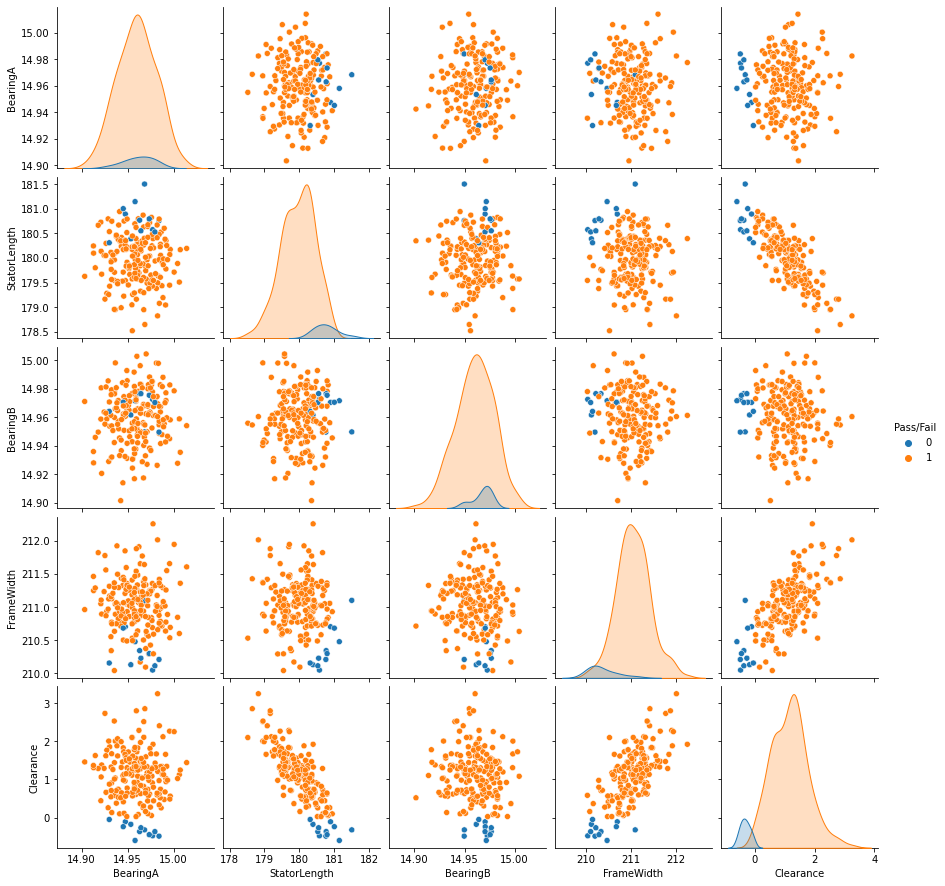

In [11]:
sns.pairplot(df, hue='Pass/Fail', diag_kind='kde');

## Exploring The Relationships Between Variables

### Create a Correlation Heatmap

First the corr() function is used to calculate the correlation matrix of the variables. Next step is to create a seaborn heatmap. This is a very effective way to quickly check correlations among columns by visualizing the correlation matrix.

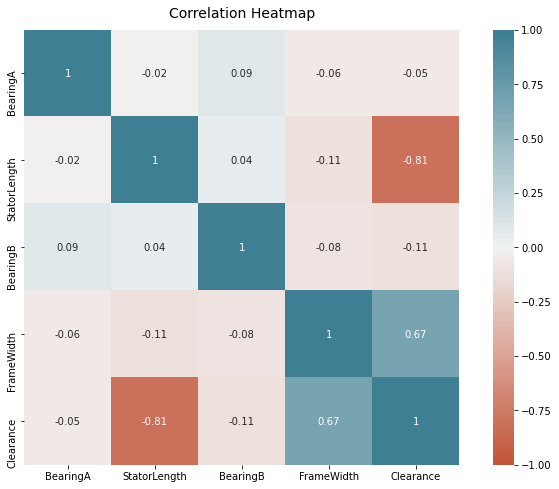

In [12]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
# first create a new df by dropping the Pass/Fail column
# Next calculate the correlation matrix for the new df

dfnew = df.drop(columns=['Pass/Fail'])
corr = dfnew.corr().round(2)

plt.figure(figsize=(12,8))

#Set a title
plt.title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

#plot the heatmap
sns.heatmap(corr, 
            vmax=1, vmin=-1, center=0, 
            cmap = sns.diverging_palette(20, 220, n=100), 
            annot=True,
           square=True);

The correlation heat map above reaffirms the initial observation of the negative correlation between Stator Length and Clearance and the positive correlation between Frame Width and Clearance. This will be explored further below.
<br >
#### Scatterplot of Stator Length vs Clearance

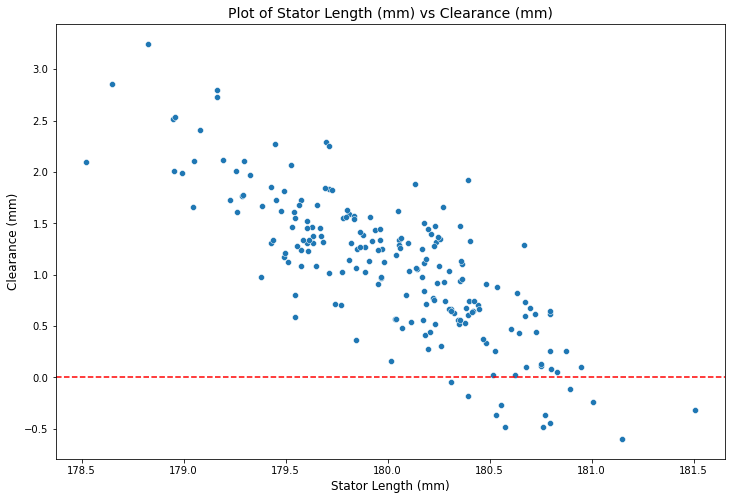

In [13]:
# add a horizontal line to show the lower limit of clearance
#https://stackoverflow.com/questions/51891370/draw-a-horizontal-line-line-at-specific-position-annotate-a-facetgrid-in-seaborn

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="StatorLength", y="Clearance")
plt.axhline(0, ls="--", c="r")
plt.title("Plot of Stator Length (mm) vs Clearance (mm)", fontsize="14")
plt.xlabel("Stator Length (mm)",fontsize="12")
plt.ylabel("Clearance (mm)", fontsize="12")
plt.show;

#### Scatterplot of Frame Width vs Clearance

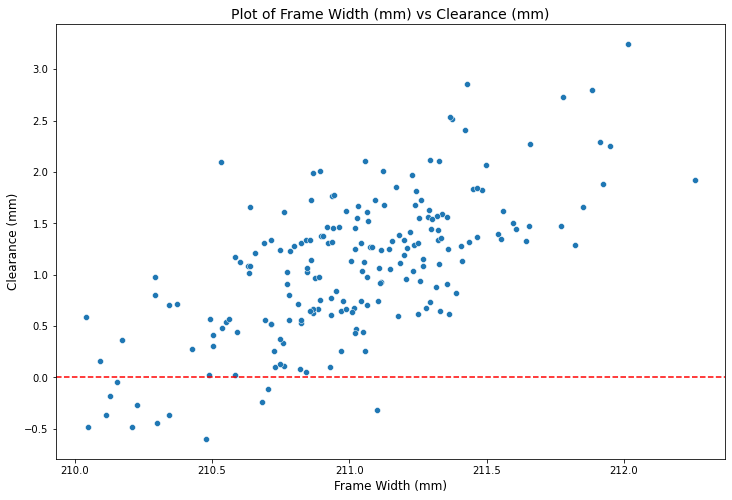

In [14]:
# add a horizontal line to show the lower limit of clearance
#https://stackoverflow.com/questions/51891370/draw-a-horizontal-line-line-at-specific-position-annotate-a-facetgrid-in-seaborn

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="FrameWidth", y="Clearance")
plt.axhline(0, ls="--", c="r")
plt.title("Plot of Frame Width (mm) vs Clearance (mm)", fontsize="14")
plt.xlabel("Frame Width (mm)",fontsize="12")
plt.ylabel("Clearance (mm)", fontsize="12")
plt.show;

### Calculate and Plot Linear Regression Equation
The next step is to calculate and plot the linear regression equation for both pairs of variables. From Wikipedia regression analysis is described as "*a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features').*" [8] Linear regression is the most common form of regression analysis. This is where the "line of best fit" for the data is calculated. Regression analysis is deployed for two conceptually distinct purposes. The first being prediction and forecasting often employed in the field of machine learning. The second, being to infer casual relationships between independent and dependent variables.

#### Using scipy.stats.linregress
The relationship between the variables is represented by the following equation:
$$E(y) = \alpha + \beta{x}$$
In the above equation, $E(y)$ is the dependent variable, $x$ is the independent variable, $\beta$ is the slope of the regression line. The next step is to calculate and plot for each variable set.

In [15]:
#import the package
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
from scipy import stats
#define x and y from the data frame
x_regSL = df['StatorLength']
y_regCl = df['Clearance']

slope, intercept, r_value, p_value, std_err = stats.linregress(x_regSL, y_regCl)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -1.083800    intercept: 196.181889


Plot the data along with the fitted line

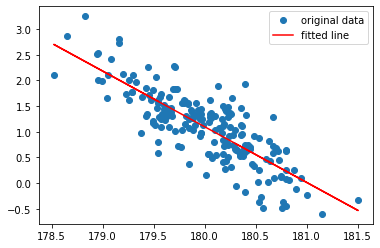

In [16]:
# add a horizontal line to show the lower limit of clearance
#https://stackoverflow.com/questions/51891370/draw-a-horizontal-line-line-at-specific-position-annotate-a-facetgrid-in-seaborn

#plt.figure(figsize=(12, 8))
#sns.scatterplot(data=df, x="StatorLength", y="Clearance")
#plt.axhline(0, ls="--", c="r")
#plt.title("Plot of Stator Length (mm) vs Clearance (mm)", fontsize="14")
#plt.xlabel("Stator Length (mm)",fontsize="12")
#plt.ylabel("Clearance (mm)", fontsize="12")
#plt.show;

plt.plot(x_regSL, y_regCl, 'o', label='original data')
plt.plot(x_regSL, intercept + slope*x_regSL, 'r', label='fitted line')
plt.legend()
plt.show();

### Create a Dataframe of the Failed Assemblies
using df.loc[ ] the assemblies with "Clearance" < 0 can be isolated to see if any interesting trends can be seen.

In [17]:
# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values
# select all the rows where Clearance value is less than 0
df_fail = df.loc[df['Clearance'] < 0]
df_fail = df_fail.drop(columns=['Pass/Fail'])
df_fail

,BearingA,StatorLength,BearingB,FrameWidth,Clearance
18,14.968,181.505,14.950,211.102,-0.322
24,14.977,180.577,14.973,210.049,-0.478
37,14.948,180.895,14.971,210.704,-0.110
39,14.958,181.148,14.972,210.478,-0.600
42,14.984,180.762,14.950,210.209,-0.487
81,14.953,180.392,14.962,210.130,-0.176
84,14.963,180.770,14.977,210.343,-0.367
132,14.945,181.005,14.971,210.683,-0.238
140,14.980,180.531,14.970,210.114,-0.368
156,14.974,180.797,14.976,210.299,-0.447


#### Sorting df_fail "Clearance" column

In [18]:
df_fail.sort_values(by='Clearance', ascending=True)

,BearingA,StatorLength,BearingB,FrameWidth,Clearance
39,14.958,181.148,14.972,210.478,-0.600
42,14.984,180.762,14.950,210.209,-0.487
24,14.977,180.577,14.973,210.049,-0.478
156,14.974,180.797,14.976,210.299,-0.447
140,14.980,180.531,14.970,210.114,-0.368
84,14.963,180.770,14.977,210.343,-0.367
18,14.968,181.505,14.950,211.102,-0.322
176,14.964,180.554,14.977,210.229,-0.266
132,14.945,181.005,14.971,210.683,-0.238
81,14.953,180.392,14.962,210.130,-0.176


#### References
[1] Design Society Publication; pdf in repo <br />
[2] Tolerance Analysis, Wikipedia; https://en.wikipedia.org/wiki/Tolerance_analysis <br />
[3] Monte Carlo Method, Wikipedia; https://en.wikipedia.org/wiki/Monte_Carlo_method <br />
[4] SKF Bearing Catalogue. Bearing 6304; https://www.skf.com/binaries/pub12/Images/0901d196807026e8-100-700_SKF_bearings_and_mounted_products_2018_tcm_12-314117.pdf <br />
[5] International Tolerance (IT) Grade Table; https://www.engineersedge.com/international_tol.htm <br />
[6] Visualizing data with pair plots in python, Towards Data Science Article; https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166 <br />
[7] Seaborn Heatmap; https://seaborn.pydata.org/generated/seaborn.heatmap.html <br />
[8] Regression Analysis, Wikipedia; https://en.wikipedia.org/wiki/Regression_analysis

Links
https://www.engineeringtoolbox.com/metric-threads-d_777.html
https://www.engineersedge.com/international_tol.htm
https://www.maford.com/SiteContent/Documents//2018_catalog_sections//MAFord_2018_Master_Catalog_HP_Drill_%20Selection_Chart.pdf